# Maximum Tangential Stress Criterion for Mixed Mode Failure

In [1]:
%matplotlib notebook
import sympy as sp
import numpy as np
sp.init_printing()
import matplotlib.pyplot as plt
import ipywidgets as ipw

In [2]:
r = sp.Symbol('r', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
tau_fps

## Representation of Global Stresses
The stresses in the global co-ordinates are expressed as:
\begin{align}
\sigma_{xz} = 
\left[
\begin{array}{cc}
\sigma_{xx} & \tau_{xz} \\
\tau_{zx} & \sigma_{zz}
\end{array}
\right] =
\left[
\begin{array}{cc}
\sigma_{x} & \tau^\mathrm{fps} \\
\tau^\mathrm{fps} & \sigma_{z}
\end{array}
\right]
\end{align}

In our case $\sigma_z = 0$ as the specimen is uniaxially loaded therefore, the stress will be depicted as follows:
The stresses in the global co-ordinates are expressed as:
\begin{align}
\sigma_{xz} = 
\left[
\begin{array}{cc}
\sigma_{xx} & \tau_{xz} \\
\tau_{zx} & 0
\end{array}
\right] =
\left[
\begin{array}{cc}
\sigma_{x} & \tau^\mathrm{fps} \\
\tau^\mathrm{fps} & 0
\end{array}
\right]
\end{align} 
$\sigma_x, \tau_{fps}, \sigma_z$ represents the stress in x-direction, shear stress in fracture process segment and stress in vertical direction respectively.

<img src="farfieldstress.png" width="500"/>

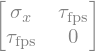

In [3]:
sigma_xz = sp.Matrix([[sigma_x, tau_fps],
                     [tau_fps, 0]])
#sigma_x0 = sigma_xz.subs(sigma_z,0)
sigma_xz#, sigma_x0

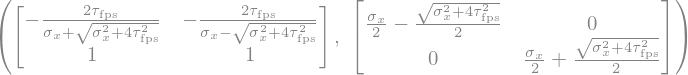

In [4]:
P_xz, D_xz = sigma_xz.diagonalize()
P_xz, D_xz

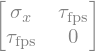

In [5]:
sp.simplify(P_xz* D_xz * P_xz**(-1))

## Representation of Far field stress in terms of Stress Intensity factors
In this implementation, the far field stresses are represented in  terms of Stress Intensity factors (SIFs) where $K_I$ represents mode I and $K_{II}$ depicts mode II. This terminology of measuring stresses in SIFs for external stress acting in uniaxial direction is shown as:
\begin{gather*}
K_I = \sigma_x \sqrt{\pi a}\sin^2 \beta  \\
K_{II} = \sigma_x \sqrt{\pi a}\sin\beta \cos\beta  
\end{gather*}
The positive sign of $K_I$ highlights stress as tension where negative sign shows compression. Similarly, negative sign of $K_{II}$ represents stress in opposite direction. $\beta$ represents the angle of crack orientation with respect to the vertical direction and $a$ represents the length of crack as depicted in figure. In the case of pure mode I failure, $\beta$ is $90°$ whereas for failure along pure mode II $\beta = 0°$. 

The figure above shows stresses in the vicinity of crack tip. $\theta$ depicts crack propagation angle and $r$ represents the radius of fracture propagation segment.

In [1]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

NameError: name 'sp' is not defined

In [45]:
K_I = sigma_x * sp.sqrt(sp.pi * a) * sp.sin(beta)**2
K_II  = sigma_x * sp.sqrt(sp.pi * a) * sp.cos(beta) * sp.sin(beta)
K_I, K_II

In [46]:
params = {beta:45*np.pi/180}

In [47]:
K_I_ = K_I.subs(params)
K_II_ = K_II.subs(params)
K_I_, K_II_

## Maximum Stress Theory
This theory was given by Sih and Erdogan. It is based on the two dimensional stresses acting on the vicinity of the crack. These stresses are given in the figure below. Moreover, they are represented as:
\begin{align}
\label{eq:sigrr}
\sigma_{rr} &= \frac{1}{\sqrt{2 \pi r}}\left( K_I \left( \cos \frac{\theta}{2}\left(1 + \sin^2 \frac{\theta}{2}\right)\right) + K_{II}\left(\sin \frac{\theta}{2}\left(1 - 
3 \sin^2 \frac{\theta}{2} \right) \right) \right) + T \cos^2 \theta 
\end{align}
\begin{align}
\label{eq:sigtt}
\sigma_{\theta\theta} 
& = \frac{1}{\sqrt{2 \pi r}}\left( K_I \left( \cos^3 \frac{\theta}{2} \right) - K_{II}\left(3 \sin \frac{\theta}{2} \cos^2 \frac{\theta}{2} \right) \right) + T \sin^2 \theta
\end{align}
\begin{align}
\label{eq:sigtr}
\sigma_{r\theta} 
& = \frac{1}{\sqrt{2 \pi r}}\left( K_I \left(\sin \frac{\theta}{2} \cos^2 \frac{\theta}{2} \right) + K_{II}\left(\cos \frac{\theta}{2}\left(1 - 3 \sin^2 \frac{\theta}{2} \right) \right) \right) + T \sin \theta \cos \theta
\end{align}
For simplicity T-Stress is neglected.

In [2]:
## Representation of sin and cos components as s_t and c_t for simplicity.
s_t, c_t = sp.symbols('s_t,c_t')
s_t_ = sp.sin(theta + beta.subs(params))
c_t_ = sp.cos(theta + beta.subs(params))
s_tb, c_tb = sp.symbols('s_tb, c_tb')
s_tb

NameError: name 'sp' is not defined

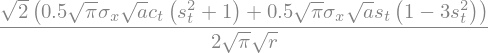

In [49]:
sigma_rr = 1/sp.sqrt(2 * sp.pi *r) * (K_I_*c_t*(1 + (s_t)**2) \
                                      + (K_II_*s_t)*(1 - 3*(s_t)**2)) #+ T*(c_t)**2
#s_rr = sigma_rr.subs(c_t, c_t_).subs(s_t, s_t_)
#s_rr
sigma_rr

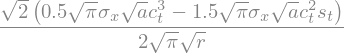

In [50]:
sigma_tt = 1/sp.sqrt(2 * sp.pi *r) * (K_I_*(c_t)**3 \
                                      - (K_II_*(3*s_t*(c_t)**2))) #+ T*s_t**2
#s_tt = sigma_tt.subs(c_t, c_t_).subs(s_t, s_t_)
#s_tt
sigma_tt

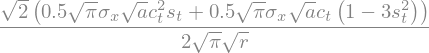

In [51]:
sigma_rt = 1/sp.sqrt(2 * sp.pi *r) * ((K_I_*(s_t*(c_t)**2)) \
                                      + ((K_II_*c_t)*(1 - 3*(s_t)**2))) #+ T*s_t*c_t
#s_rt = sigma_rt.subs(c_t, c_t_).subs(s_t, s_t_)
#s_rt
sigma_rt

The stresses in the vicinity of the crack will be represented by tensorial representation as:

\begin{align}
\sigma = 
\left[
\begin{array}{cc}
\sigma_{rr} & \tau_{rt} \\
\tau_{rt} & \sigma_{tt}
\end{array}
\right] 
\end{align}

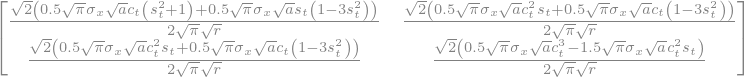

In [52]:
sigma = sp.Matrix([[sigma_rr, sigma_rt],
                     [sigma_rt, sigma_tt]])
sigma

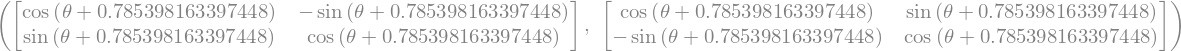

In [53]:
R = sp.Matrix([[c_t_, -s_t_],
              [s_t_,   c_t_]])
R, R.T

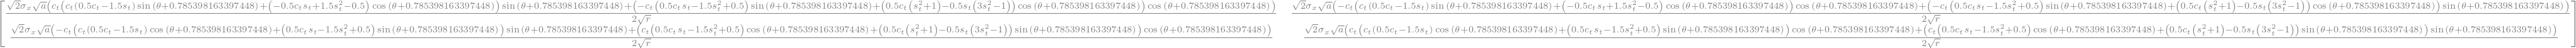

In [54]:
#s_t1 = sp.sin(theta) / 2
#c_t1 = sp.cos(theta) / 2
#s = sigma.subs(s_t,s_t1).subs(c_t,c_t1)
s = sigma
sigma_ = R * s * R.T #.subs(s_t,s_t_).subs(c_t,c_t_) #transformation into global stress matrix
sig = sp.simplify(sigma_) 
sig

In [55]:
P_rt, D_rt = sig.diagonalize()
P_rt, D_rt;
#s_t_ = sp.sin(theta + beta.subs(params))
#c_t_ = sp.cos(theta + beta.subs(params))
#s_t_

In [56]:
sp.simplify(P_rt * D_rt * P_rt**(-1));

KeyboardInterrupt: 

In [ ]:
D = sp.expand_trig(D_rt)
D;

In [ ]:
params = {a:15, r:3, c_t: 0.866, T:5, s_t:0.5} #theta: 0.52}

In [ ]:
theta_ = sp.atan( sp.simplify(P_rt[0,0] / P_rt[1,0]))
theta_

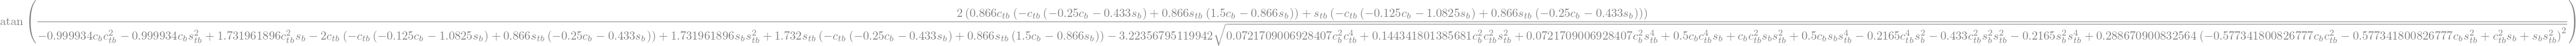

In [36]:
get_theta_ = sp.lambdify((theta), theta_.subs(params))
theta_.subs(params)

In [22]:
#sigma_tt_val = 3

In [27]:
# _, (ax1) = plt.subplots(1, 1, figsize=(6,3))
# sig_x = np.linspace(sigma_tt_val - 0.000001,-2*sigma_tt_val,100)
# eta = 0.01
# tau_xx = eta * sigma_tt_val
# th_f = get_theta_(
#     tau_xx,sig_x[:, np.newaxis])
# ax1.plot(sig_x, th_f/np.pi * 180, color='blue', lw=2 );
# ax1.set_xlabel(r'$\sigma_x$'); ax1.set_ylabel(r'$\theta$')
# ax1.legend()

In [ ]:
# _, (ax1) = plt.subplots(1, 1, figsize=(6,3))
# tau_val = np.linspace(0.00001, 0.1, 100)
# th_f = get_theta_f(
#     tau_val[np.newaxis, :], #row vector
#     sig_x[:, np.newaxis]) #column vector
# sig_z = get_sigma_z(
#     tau_val[np.newaxis, :],
#     sig_x[:, np.newaxis])
# ax1.plot(th_f, sig_z);
# ax1.set_xlabel(r'$\theta$'); ax1.set_ylabel(r'$\sigma_z$')
# ax1.legend()

In [ ]:
# DELTA = np.ones(2)
# P_x0_norm = P_x0.norm()
# get_P_x0 = sp.lambdify((tau_fps, sigma_x), P_x0, 'numpy')
# get_P_xf = sp.lambdify((tau_fps, sigma_x), P_xf.subs(params), 'numpy')
# get_D_x0 = sp.lambdify((tau_fps, sigma_x), D_x0, 'numpy')
# get_D_xf = sp.lambdify((tau_fps, sigma_x), D_xf.subs(params), 'numpy')
# P_x0_norm

In [ ]:
# def get_D_x0_vals(tau_val = 1, sig_val = 2.8):
#     D_x0_vals = get_D_x0(tau_val,sig_val)
#     D_x0_vct = np.einsum('...i,...ij->...j', DELTA, D_x0_vals)
#     return D_x0_vct[np.newaxis,:]

In [ ]:
# def get_D_xf_vals(tau_val = 1, sig_val = 2.8):
#     D_xf_vals = get_D_xf(tau_val,sig_val)
#     D_xf_vct = np.einsum('i,ij->j', DELTA, D_xf_vals)
#     return D_xf_vct[np.newaxis,:]

In [ ]:
# def get_T_x0_args(tau_val, sig_val): 
#     P_x0_vals = get_P_x0(tau_val,sig_val)
#     print(P_x0_vals)
#     norm_P_x0_vals2 = np.sqrt(np.einsum('ij,ij->j', P_x0_vals, P_x0_vals)) #element wise multiplication and sum along j?
#     T_x0 = P_x0_vals / norm_P_x0_vals2
#     T_x0_scaled = T_x0 * get_D_x0_vals(tau_val, sig_val)
#     T_x0_0 = np.zeros_like(T_x0)
#     T_x0_args = np.einsum('ijk->jik', np.array([T_x0_0, T_x0_scaled]))
#     return T_x0_args

In [ ]:
# def get_T_xf_args(tau_val, sig_val, pos = np.array([[0,0]])): 
#     P_xf_vals = get_P_xf(tau_val,sig_val)
#     norm_P_xf_vals2 = np.sqrt(np.einsum('ij,ij->j', P_xf_vals, P_xf_vals))
#     T_xf = P_xf_vals / norm_P_xf_vals2
#     T_xf_scaled = T_xf * get_D_xf_vals(tau_val, sig_val)
#     T_xf_0 = np.zeros_like(T_xf)
#     T_vxt = np.array([T_xf_0, T_xf_scaled])
#     pos_lk = pos
#     T_xf_args = pos_lk[:,None,:, None] + T_vxt[None,:,:,:] #???
#     return np.einsum('lijk->jlik', T_xf_args)

In [ ]:
# tau_, sig_x_ = 1, 0.1
# T_xf_args = get_T_xf_args(2,sig_x_, np.array([[1,0]]))
# T_xf_args

In [ ]:
# sig_x_ = np.linspace(2.5, -2.5, 4)
# sig_z_ = get_sigma_z(tau_,sig_x_)
# pos_lk = np.c_[sig_x_, sig_z_]
# pos_lk

In [ ]:
# tau_, sig_x_ = 1, 0.1
# T_x0_args = get_T_x0_args(tau_,sig_x_)
# T_xf_args = get_T_xf_args(tau_,sig_x_, pos_lk)
# fix, ax = plt.subplots(1,1)
# ax.plot(*T_x0_args, color='blue');
# ax.plot(*T_xf_args.reshape(2,-1,2), color='green');
# ax.axis('equal');